<a href="https://colab.research.google.com/github/Ramki-Rks/Supervised-ML-BIKE-SHARING-DEMAND-PREDICTION/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#Mounting Drive in colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from datetime import datetime
import datetime as dt

In [ ]:
#Load the Dataset with encoding by "unicode_escape"
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Supervised Learning-Regression/Copy of SeoulBikeData.csv",encoding="unicode_escape")

In [ ]:
#first five rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
#size of the dataset
df.shape

(8760, 14)

In [ ]:
#checking Null Data in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There is no null value present in our Dataset

In [ ]:
#Overall Description of  Dataset
df.describe(include="all")

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [ ]:
#checking no.of.unique categorical variable present 
df.select_dtypes(include="object").nunique()

Date               365
Seasons              4
Holiday              2
Functioning Day      2
dtype: int64

In [ ]:
#unique value of seasons
df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#to get insight of the dataset lets use description command(.T used to change row and columns)
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [ ]:
#checking missing values if any
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
#correlation of dataset
correlation=df.corr()
correlation

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
month                               0.070861  1.036729e-15         0.049683   
weekdays_weekend                   -0.032259 -2.300554e-17        -0.012972   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
month                         0.047798         -0.082069          0.077888   
weekdays_weekend             -0.036750         -0.022391          0.030650   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
month                                       0.065101                -0.030412   
weekdays_weekend                           -0.028966                 0.008271   

                           Rainfall(mm)  Snowfall (cm)         month  \
Rented Bike Count             -0.123074      -0.141804  7.086107e-02   
Hour                           0.008715      -0.021516  1.036729e-15   
Temperature(°C)                0.050282      -0.218405  4.968327e-02   
Humidity(%)                    0.236397       0.108183  4.779778e-02   
Wind speed (m/s)              -0.019674      -0.003554 -8.206909e-02   
Visibility (10m)              -0.167629      -0.121695  7.788783e-02   
Dew point temperature(°C)      0.125597      -0.150887  6.510073e-02   
Solar Radiation (MJ/m2)       -0.074290      -0.072301 -3.041240e-02   
Rainfall(mm)                   1.000000       0.008500 -2.279368e-02   
Snowfall (cm)                  0.008500       1.000000  5.475846e-02   
month                         -0.022794       0.054758  1.000000e+00   
weekdays_weekend              -0.014280      -0.022557  9.174254e-

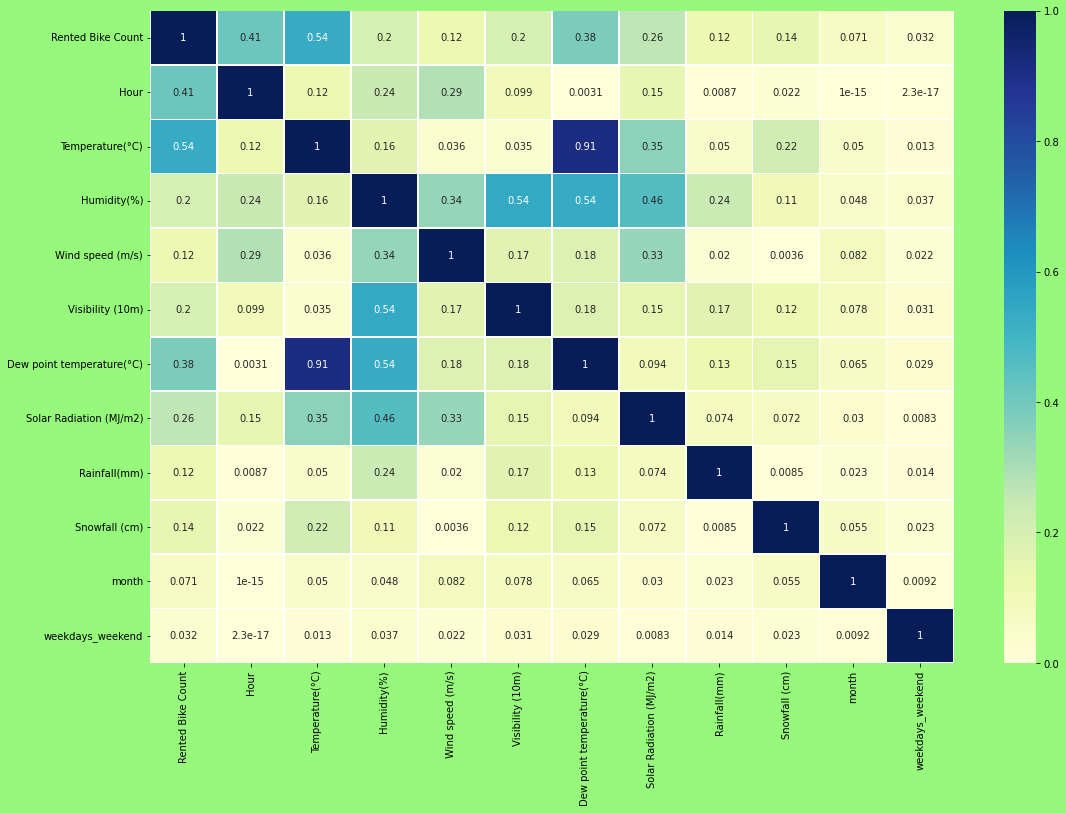

In [ ]:
#checking correlation  of numerical feature using heatmap

plt.figure(figsize=(18,12),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(abs(correlation),annot=True,cmap='YlGnBu',linewidths=.5)

##from the above correlation chart there is highly correlated between temperature and dew point temperature. but temperature column is less correlate with rented bike count compare to dew point temperature. so remove dew point temperature

In [ ]:
#checking multicolinarity by using Variation inflation factor[VIF] between each feature. if VIF<= 5 then acceptable. 5<VIF>10 then average. above 10 not acceptable
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

above table the maximum VIF value is 6. so we can go with above numerical feature  for modelling

#EDA of DATASET FEATURES

In [ ]:
# lets work with  Numeric Features (exclude object is used to exclude catagorial value )
numeric_features= df.select_dtypes(exclude='object')
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


Here there is no null value . unless we need to  fill with either mean, median, mode dependss upton situation 

In [ ]:
# with transpose feature we transform decribe of numeric features
numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Rented Bike Count')]

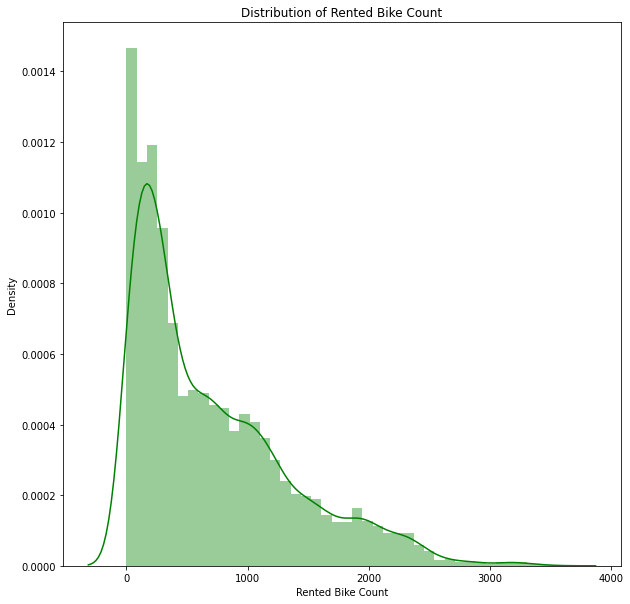

In [ ]:
#let check distribution of dependent variable by calling sns dishplot
plt.figure(figsize=(10,10))
sns.distplot(df["Rented Bike Count"],color="g").set(title="Distribution of Rented Bike Count")

Rented Bike Count is positively skewed 

In [ ]:
# checking any zero value present in dependent variable
df.loc[df["Rented Bike Count"]==0]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
3144                  0     0             14.4           82               4.6   
3145                  0     1             13.6           81               3.6   
3146                  0     2             12.7           80               3.9   
3147                  0     3             11.6           81               3.1   
3148                  0     4             10.2           83               3.5   
...                 ...   ...              ...          ...               ...   
8251                  0    19             11.9           71               2.7   
8252                  0    20             11.9           72               2.5   
8253                  0    21             11.4           74               1.9   
8254                  0    22             11.2           75               1.7   
8255                  0    23             10.9           76               1.2   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
3144              1041                       11.3                      0.0   
3145               886                       10.3                      0.0   
3146               885                        9.3                      0.0   
3147               687                        8.4                      0.0   
3148               554                        7.4                      0.0   
...                ...                        ...                      ...   
8251               589                        6.7                      0.0   
8252               526                        7.0                      0.0   
8253               498                        6.9                      0.0   
8254               478                        6.9                      0.0   
8255               456                        6.8                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
3144           0.0            0.0  Spring  No Holiday              No     11   
3145           0.0            0.0  Spring  No Holiday              No     11   
3146           0.0            0.0  Spring  No Holiday              No     11   
3147           0.0            0.0  Spring  No Holiday              No     11   
3148           0.0            0.0  Spring  No Holiday              No     11   
...            ...            ...     ...         ...             ...    ...   
8251           0.0            0.0  Autumn  No Holiday              No      9   
8252           0.0            0.0  Autumn  No Holiday              No      9   
8253           0.0            0.0  Autumn  No Holiday              No      9   
8254           0.0            0.0  Autumn  No Holiday              No      9   
8255           0.0            0.0  Autumn  No Holiday              No      9   

      weekdays_weekend  
3144                 1  
3145                 1  
3146                 1  
3147                 1  
3148                 1  
...                ...  
8251                 0  
8252                 0  
8253                 0  
8254                 0  
8255                 0  

[295 rows x 15 columns]

#there is few zero value present in dependent variable . so we can use any transform method like squre root, log10 or some other method. but when we use squre root transform. because log transform transfer more aggesively

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Sqrt Transformed Distribution of Rented Bike Count')]

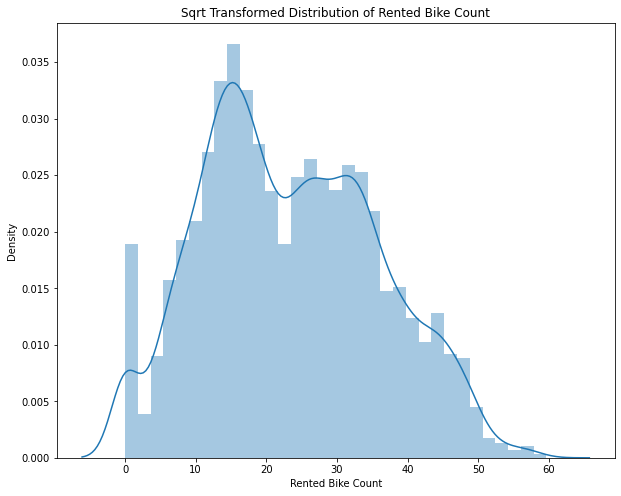

In [ ]:
# log transformed histogram
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count'])).set(title="Sqrt Transformed Distribution of Rented Bike Count")


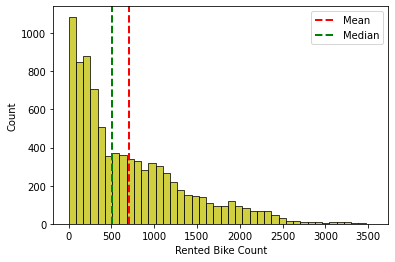

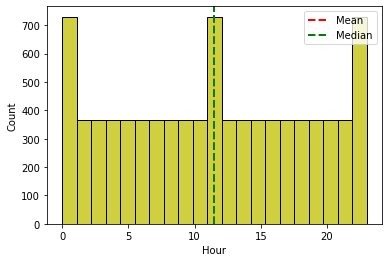

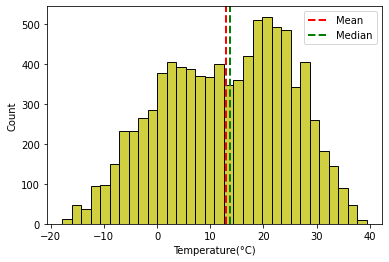

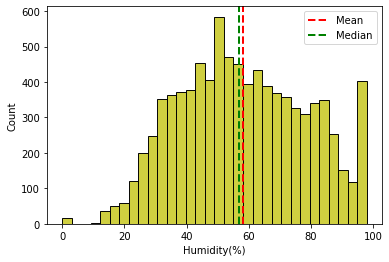

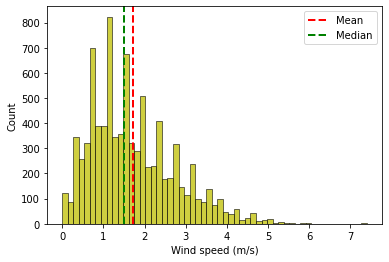

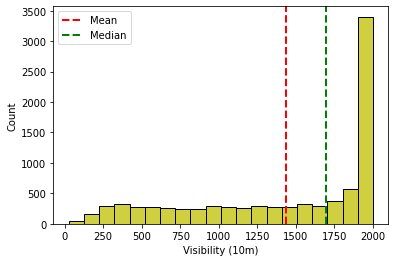

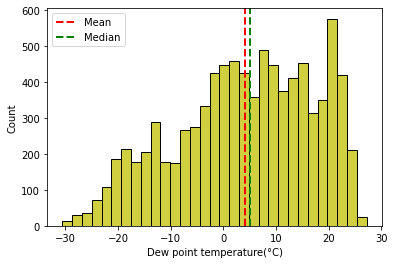

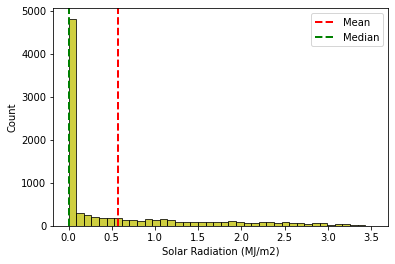

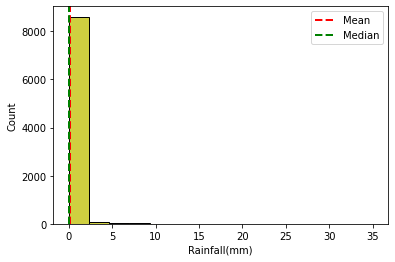

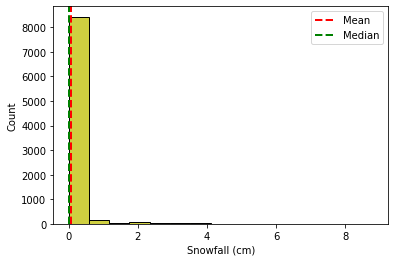

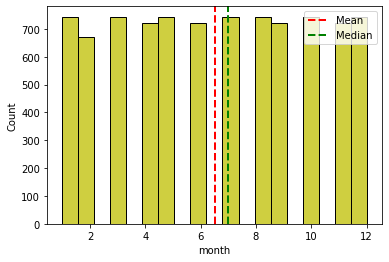

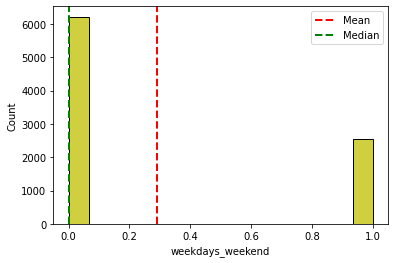

In [ ]:
#plotting histogram of all numeric features with statistic parameter

for col in numeric_features[:]:
  sns.histplot(df[col],color="y")
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)   
  plt.legend(["Mean","Median"])
  plt.show()

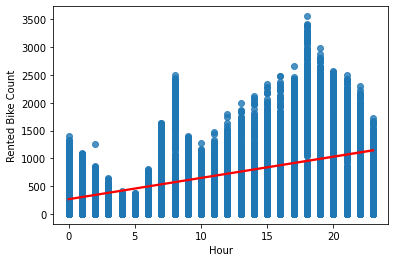

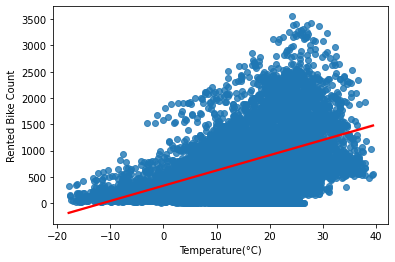

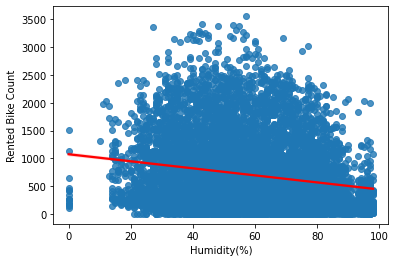

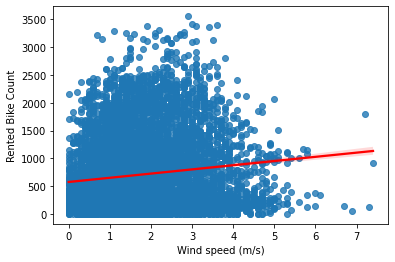

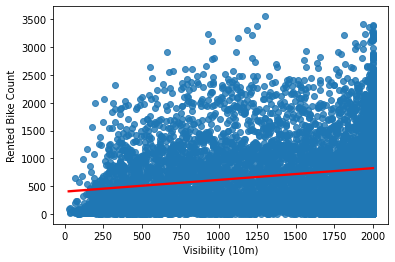

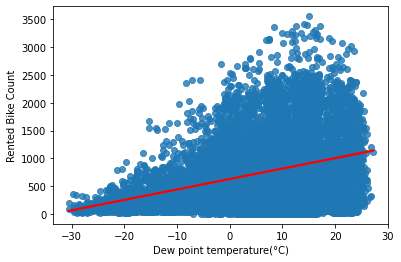

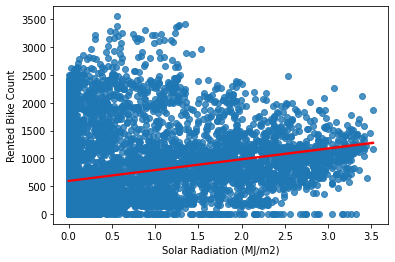

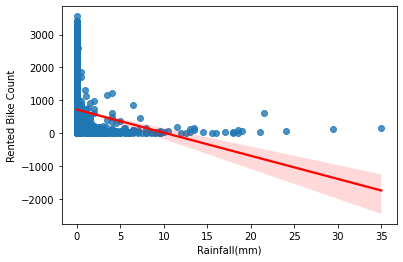

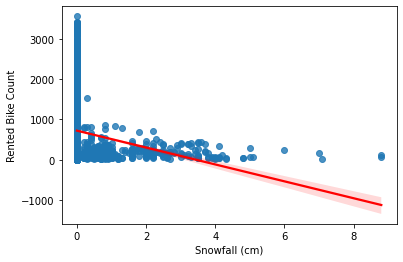

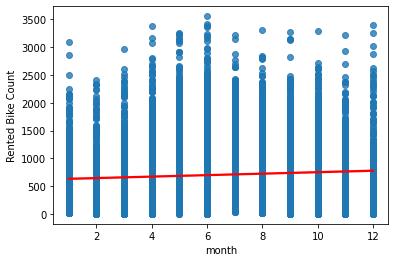

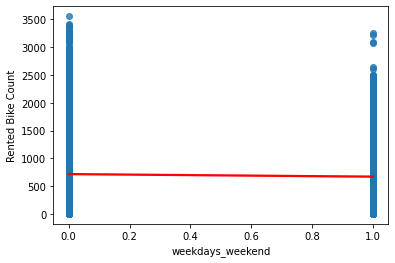

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

Conclusion:

When bikes count increase with Hour, Temperature, wind speed, solar radiation, dew point temperature.

Remaining other parameter decreases with bike count

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
#Extracting categorical features from the dataset
categorical_features= df.select_dtypes(include='object')
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

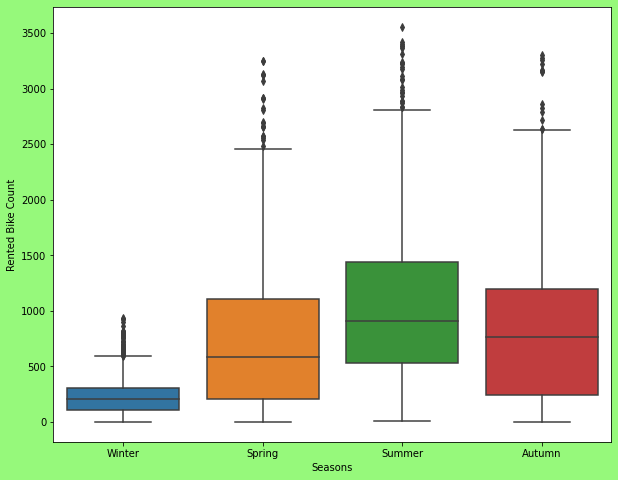

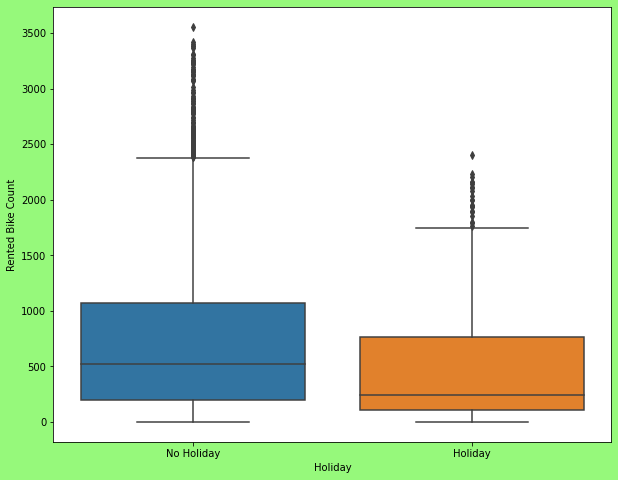

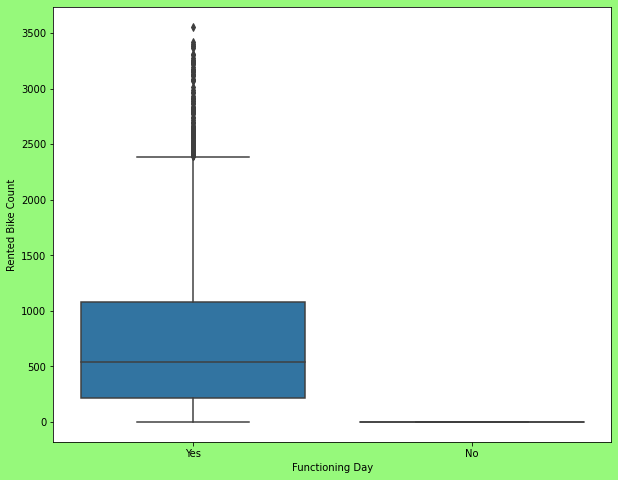

In [ ]:
#ploting Box plot to visualize and trying to get information about each categorical features
for col in categorical_features:
  plt.figure(figsize=(10,8),edgecolor='k',facecolor='xkcd:light green')
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

Conclusion drawn from above plot

1)Less demand on winter seasons and 
Sligthly Higher demand during Non holidays

2)Almost no demnad on non functioning day

<Figure size 720x576 with 0 Axes>

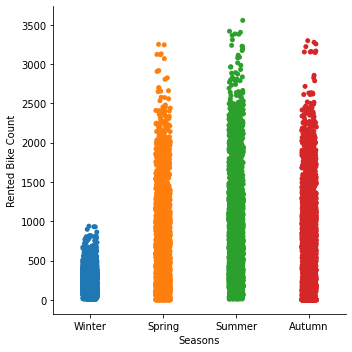

<Figure size 720x576 with 0 Axes>

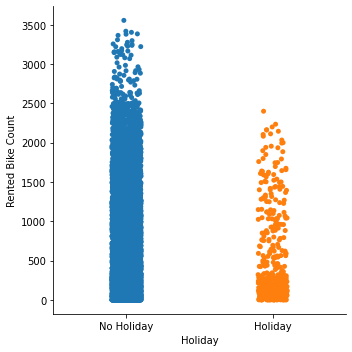

<Figure size 720x576 with 0 Axes>

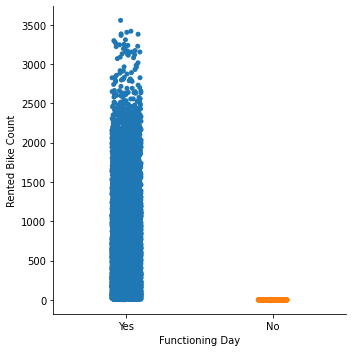

In [ ]:
#ploting cat plot for more info about categorical features
for i in categorical_features:
  plt.figure(figsize=(10,8),edgecolor='g',facecolor='xkcd:light green')
  sns.catplot(x=i,y='Rented Bike Count',data=df)

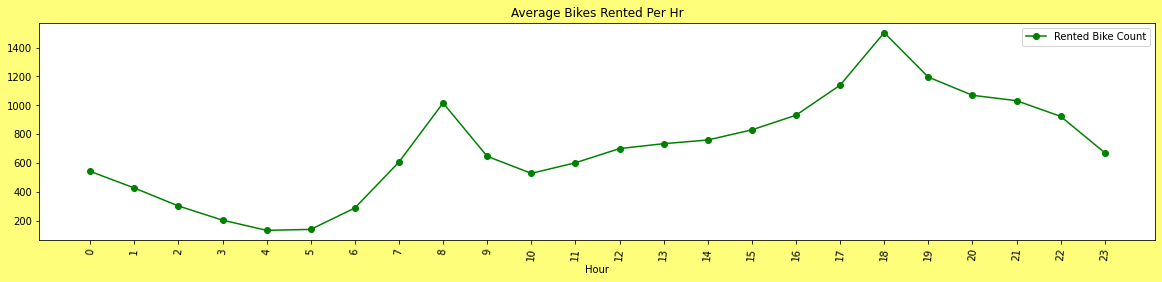

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4),facecolor='xkcd:light yellow')
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr", color='g')
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

During morning 6-10 Am and 16-20 Pm haveing high demand of bike due to office opening and closing time. but at morning 7 Am  the bike demand always high level 

In [ ]:
#grouping  mean of rental bike with respect to railfall
rainfall_bike_count =df.groupby("Rainfall(mm)")["Rented Bike Count"].mean()[:10]

In [ ]:
rainfall_bike_count[:10]

Rainfall(mm)
0.0     739.311103
0.1     329.978261
0.2     185.300000
0.3     155.666667
0.4     134.187500
0.5     246.586207
0.7     165.000000
0.8      96.000000
0.9     489.333333
1.0     127.560606
1.1     401.000000
1.2      47.000000
1.3     764.000000
1.4     100.000000
1.5     101.535714
1.6     130.666667
1.8     167.000000
1.9      22.000000
2.0     126.322581
2.4      35.000000
2.5      56.173913
3.0      46.142857
3.3     170.000000
3.5     110.222222
3.7      32.000000
4.0     223.428571
4.5      76.000000
4.9      65.000000
5.0      91.600000
5.4     154.000000
5.5      45.000000
6.0      15.666667
6.4     430.500000
6.5      60.000000
7.0      37.000000
7.3     468.000000
7.5       9.000000
8.0      57.333333
8.5      19.500000
9.0      19.500000
9.1      24.000000
9.5      19.333333
10.0     28.000000
Name: Rented Bike Count, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


Text(0.5, 1.0, 'Railfall(mm) Vs Avg Bike Count')

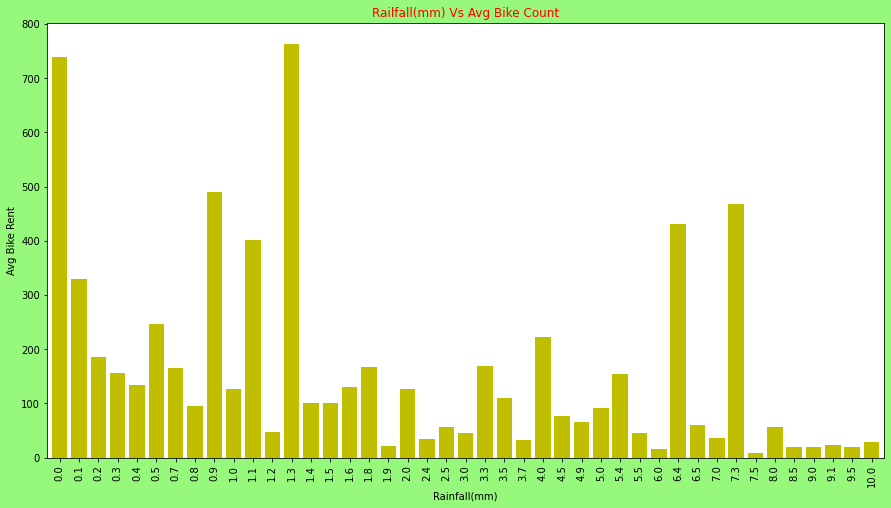

In [ ]:
#plotting rainfall vs avg rental bike count
plt.figure(figsize=(15,8), facecolor='xkcd:light green')
rainfall_bike_count.plot(kind="bar", width=0.8,color="Y")
plt.ylabel("Avg Bike Rent", size=10)
plt.title("Railfall(mm) Vs Avg Bike Count", color="r")

In [ ]:
#write one-hot coding for categorical features
categorical_features_dummy=pd.get_dummies(categorical_features, drop_first=True)
categorical_features_dummy

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [ ]:
#concating numeric and dummy columns to creating final df1
df1= pd.concat([numeric_features,categorical_features_dummy],axis=1)

In [ ]:
df1

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  month  weekdays_weekend  Seasons_Spring  \
0              0.0            0.0      1                 0               0   
1              0.0            0.0      1                 0               0   
2              0.0            0.0      1                 0               0   
3              0.0            0.0      1                 0               0   
4              0.0            0.0      1                 0               0   
...            ...            ...    ...               ...             ...   
8755           0.0            0.0     11                 0               0   
8756           0.0            0.0     11                 0               0   
8757           0.0            0.0     11                 0               0   
8758           0.0            0.0     11                 0               0   
8759           0.0            0.0     11                 0               0   

      Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0                  0               1                   1                    1  
1                  0               1                   1                    1  
2                  0               1                   1                    1  
3                  0               1                   1                    1  
4                  0               1                   1                    1  
...              ...             ...                 ...                  ...  
8755               0               0                   1                    1  
8756               0               0                   1                    1  
8757               0               0                   1                    1  
8758               0               0                   1                    1  
8759               0               0                   1                    1  

[8760 rows x 17 columns]

#Here number of rended bike count is Dependent Variable and others are treated as independent variable

<Figure size 2500x2500 with 0 Axes>

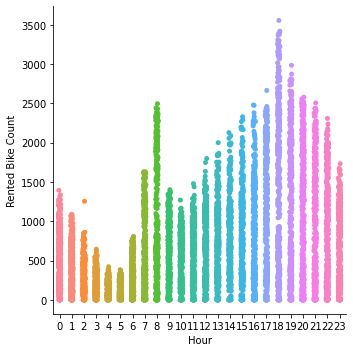

<Figure size 2500x2500 with 0 Axes>

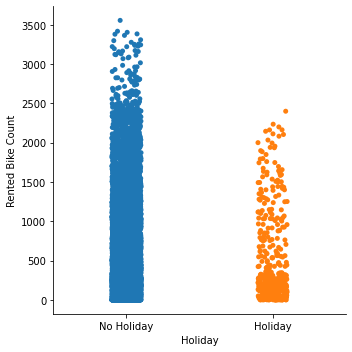

<Figure size 2500x2500 with 0 Axes>

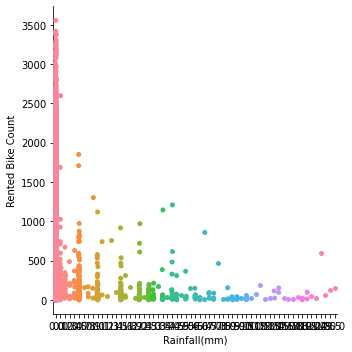

<Figure size 2500x2500 with 0 Axes>

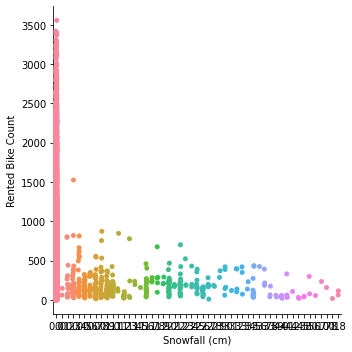

<Figure size 2500x2500 with 0 Axes>

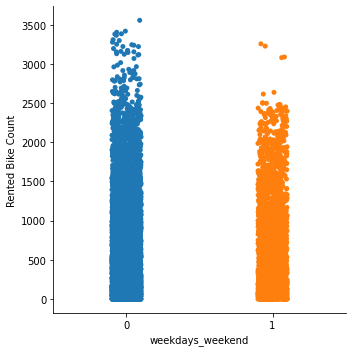

In [ ]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for features in feature_list:
  plt.figure(figsize=(10,10),dpi=250)
  sns.catplot(x=features,y='Rented Bike Count',data=df)
  plt.show()

Conclusion

at peak hour time of office rended bike count going more

when snowfall and rainfall time the count of rended bike decreases drastically

at week days rended bike count more than week-end day



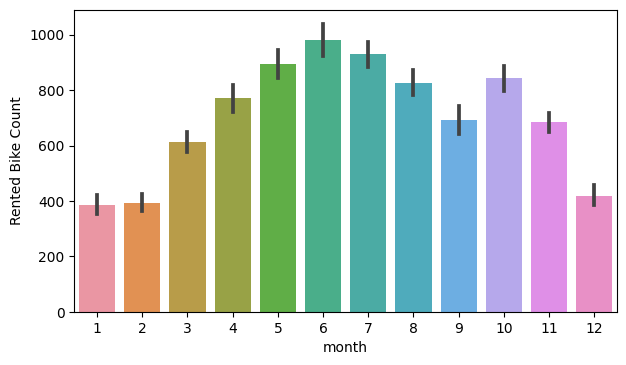

In [ ]:
#month wise rended bike count by plotting bar chart
plt.figure(figsize=(7,4),dpi=100)
sns.barplot(x='month',y='Rented Bike Count',data=df)
plt.show()

Conclusion drawn from the bar chart

During winter seasons i.e.,December, january,February we can see that there less demand of Rented bike 

similarly at summer time like may july june the demand of bike is maximum

##Lets start  to develop the diferent model

In [ ]:
X=df1.drop(["Rented Bike Count"],axis=1)

In [ ]:
Y=np.sqrt(df1['Rented Bike Count'])

In [ ]:
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
X.shape

(8760, 16)

In [ ]:
X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  month  weekdays_weekend  Seasons_Spring  Seasons_Summer  \
0            0.0      1                 0               0               0   
1            0.0      1                 0               0               0   
2            0.0      1                 0               0               0   
3            0.0      1                 0               0               0   
4            0.0      1                 0               0               0   

   Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0               1                   1                    1  
1               1                   1                    1  
2               1                   1                    1  
3               1                   1                    1  
4               1                   1                    1

In [ ]:
#spliting dataset for train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [ ]:
x_train.shape

(6570, 16)

In [ ]:
x_test.shape

(2190, 16)

In [ ]:
#scaling both test, and train data to transform  using sklearn library 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(x_train)
X_test = std.transform(x_test)

In [ ]:
X_train[:1]

array([[-1.36874406, -1.71165528,  0.47421008, -0.78354199,  0.33582343,
        -1.26534686, -0.65163688, -0.12795769,  4.46880116,  1.58899392,
        -0.63265769, -0.57488971, -0.58004517,  1.72749323,  0.22738694,
         0.18525631]])

#Creating Function to train models and Evaluation matrix of regression

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
Mean_Sq_Error=[]
Root_Mean_Sq_Error=[]
R2_List=[]
Adj_R2_List=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  
  

#appending metric to list
  Mean_Sq_Error.append(MSE)
  Root_Mean_Sq_Error.append(RMSE)
  R2_List.append(r2)
  Adj_R2_List.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10),facecolor='xkcd:light green')
  plt.plot((pred)[:100],marker='o')
  plt.plot((np.array(y_test)[:100]),marker='o')
  plt.legend(["Predicted","Actual"])
  plt.show()

#creating function to run diffirent models

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit the Model
    model.fit(X_train,y_train)
    
    # Get prediction value of y
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    #train_class_preds = linear_model.predict(X_train)

   

    Mean_Sq_Error.append(MSE)
    Root_Mean_Sq_Error.append(RMSE)
    R2_List.append(r2)
    Adj_R2_List.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10),facecolor='xkcd:light green')
    plt.plot(np.array(y_test[:100]),marker="o")
    plt.plot(preds[:100],marker="o")    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

#creating function to get feature importance

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#Create Function for Visualisation of Tree.

In [ ]:
def visualization_tree(model,X_train):
  from sklearn.tree import DecisionTreeRegressor, export_graphviz
  from sklearn import tree
  from IPython.display import SVG
  from graphviz import Source
  from IPython.display import display
  graph = Source(tree.export_graphviz(model, out_file=None, feature_names=X_train.columns,filled= True))
  display(SVG(graph.pipe(format='svg')))





##**Now Lets implement 12 models on our dataset:**
1. **Linear Regression**
2. **Lasso Regression**
3. **Ridge Regression**
4. **Elastic Net Regression**
5. **Polynomial Regression**
6. **K nearest neighbours**
7. **Decision Tree**
8. **Random Forest**
9. **Gradient Boost**
10. **XGBoost**
11. **lightGBM**
12. **CatBoost**


**We will be using three search algorithms for each :**

1. **GridSearchCV**
2. **RandomSearchCV**


##Setting the Hyperparameter for tuning


In [ ]:
parameters_dict_lasso = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}

parameters_dict_ridge = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}

parameters_dict_elastic_net = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}

param_dict_knn={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}



parameters_dict_rf_grid=[{'n_estimators':[20,30,40,60,100], 'max_depth':  
             [5,10,15,20]},
             {'n_estimators':[20,30,40,60,100], 'max_depth': 
             [5,10,15,20],'max_features':[2,5,8]}]

parameters_dict_rf_random=[{'n_estimators':[20,30,40,60,100], 'max_depth':[5,10,15,20] 
          },{'n_estimators':[20,30,40,60,100], 'max_depth':[5,10,15,20]
             ,'max_features':[2,5,8]}]

In [ ]:
#hyper parameter tuning library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from skopt import BayesSearchCV

#1. **Linear Regression**

In [ ]:
#linear Regression library
from sklearn.linear_model import LinearRegression


================Evalution Matrix=========================

MSE : 175590.55287332067
RMSE : 419.03526447462707
R2 : 0.5729108337712392
Adjusted R2 :  0.5697661367350404
  =========================================================  Evalution Graph  ===================================================



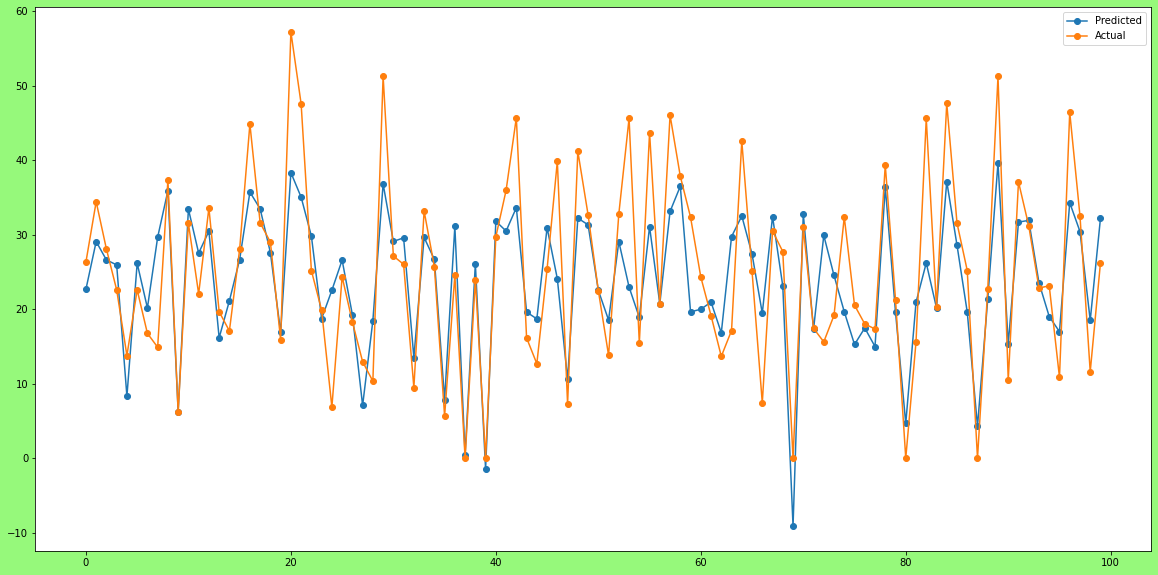

In [ ]:
#fitting the linear regression model
linear_reg=LinearRegression()
train_linear_model(linear_reg, X_train, y_train, X_test, y_test)

In [ ]:
#linear regression model intercept
linear_reg.intercept_

23.3893626063294

In [ ]:
#linear regression model co-efficient
linear_reg.coef_

array([ 3.41968699, -0.09631816, -6.06121741,  0.05843068, -0.05652447,
        6.82995289, -0.55465867, -1.62151558,  0.10985212,  0.3169146 ,
       -0.29551227, -1.13055517, -1.29724672, -3.40834853,  0.61852851,
        5.03749648])

##Regularization

##2)Lasso Regression

In [ ]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.linear_model import Lasso
lasso_model = Lasso()
#setting the parameters of the lasso model

lasso_grid = GridSearchCV(lasso_model, param_grid=parameters_dict_lasso, scoring='neg_mean_squared_error', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 175561.28194420706
RMSE : 419.0003364487994
R2 : 0.5729820294962102
Adjusted R2 :  0.5698378566807198
  =========================================================  Evalution Graph  ===================================================



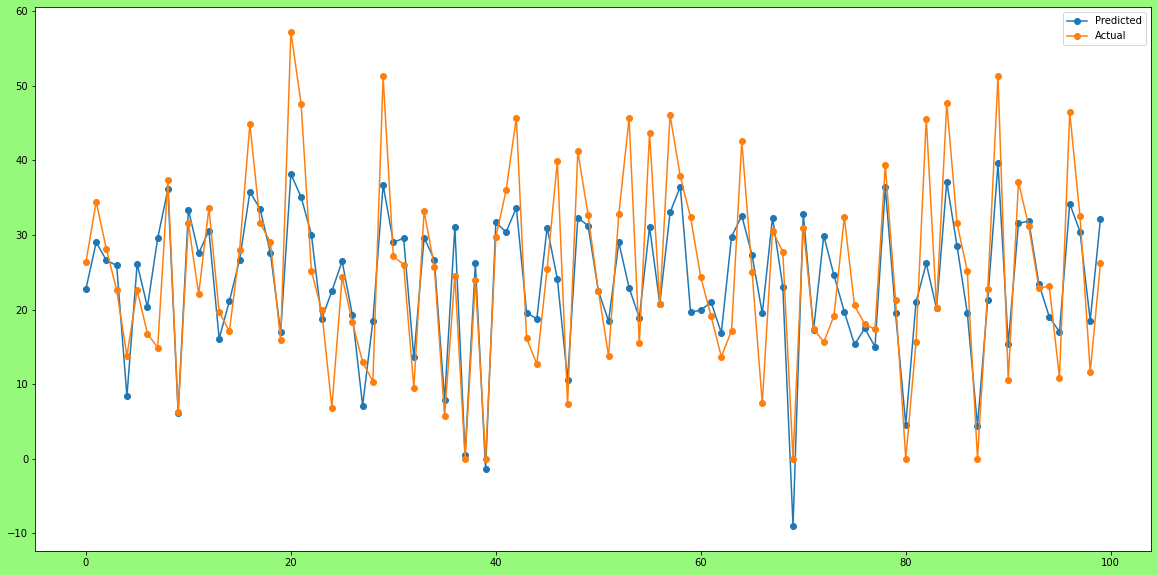

In [ ]:
# using train_linear_model function to train,fit and evalution of lasso model Regression
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##3)Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

ridge_grid = GridSearchCV(ridge, param_grid=parameters_dict_ridge, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175439.1127526881
RMSE : 418.8545245699133
R2 : 0.5732791818047533
Adjusted R2 :  0.5701371969491971
  =========================================================  Evalution Graph  ===================================================



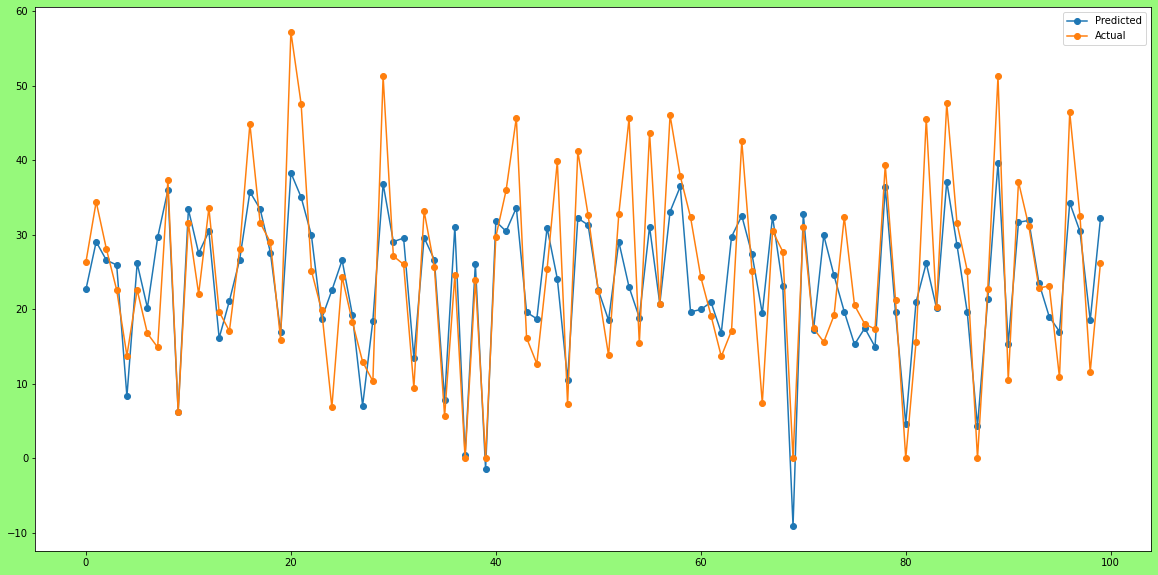

In [ ]:
#fitting the Ridge model and evalution matrix
train_linear_model(ridge_grid, X_train,y_train,X_test,y_test)

#4)ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

#using gridsearchcv to find the best parameters for ridge model
elastic_grid = GridSearchCV(elastic, param_grid=parameters_dict_elastic_net, scoring='neg_mean_squared_error',cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 175346.87865283425
RMSE : 418.74440730932065
R2 : 0.5735035229447512
Adjusted R2 :  0.5703631899337599
  =========================================================  Evalution Graph  ===================================================



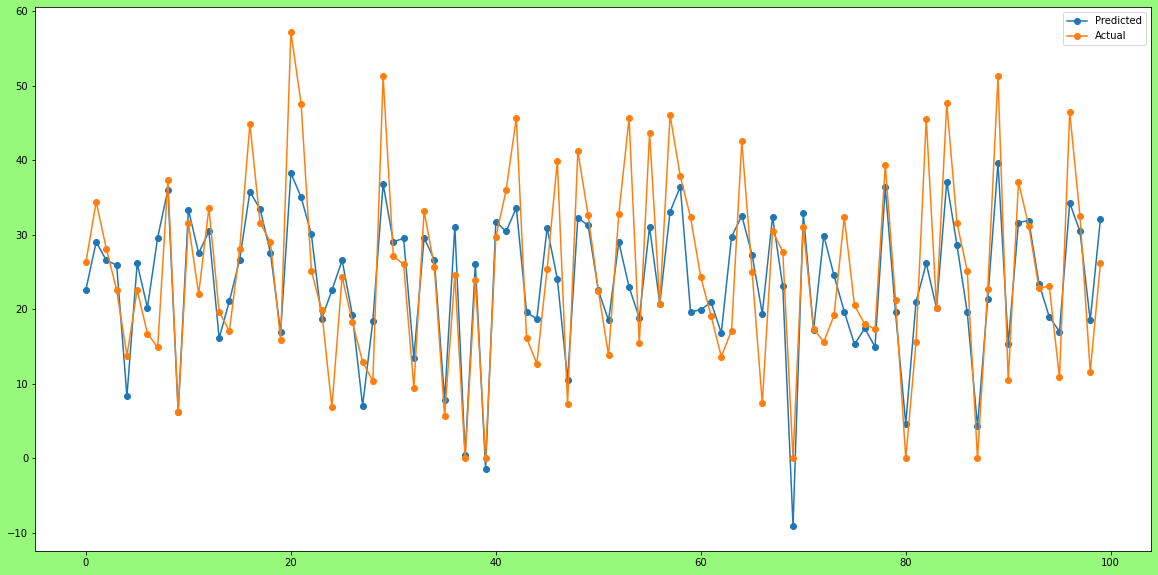

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

#5)Polynomial Regression

In [ ]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 117565.50002070636
RMSE : 342.87825830855235
R2 : 0.7140452572221503
Adjusted R2 :  0.7119397460005923
  =========================================================  Evalution Graph  ===================================================



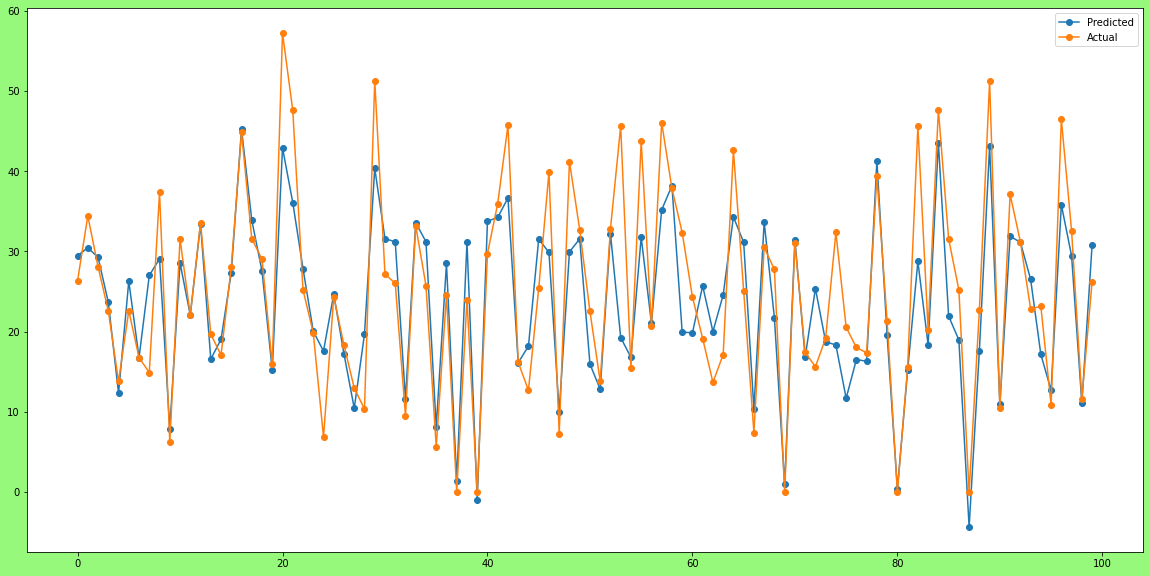

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

##Train | Test split for decision Based Model

In [ ]:
#creating X for independent variable
X=df1.drop(['Rented Bike Count'],axis=1)

In [ ]:
#creating y for dependent variable
y=df1['Rented Bike Count']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##6)KNN Model

In [ ]:
#importing KNN library
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler

In [ ]:
#creating model
scaler = MinMaxScaler()

In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83411.75920852358
RMSE : 288.81094025075225
R2 : 0.7961594359879383
Adjusted R2 :  0.7946585390600998
    =========================================================    Evalution Graph    ===================================================



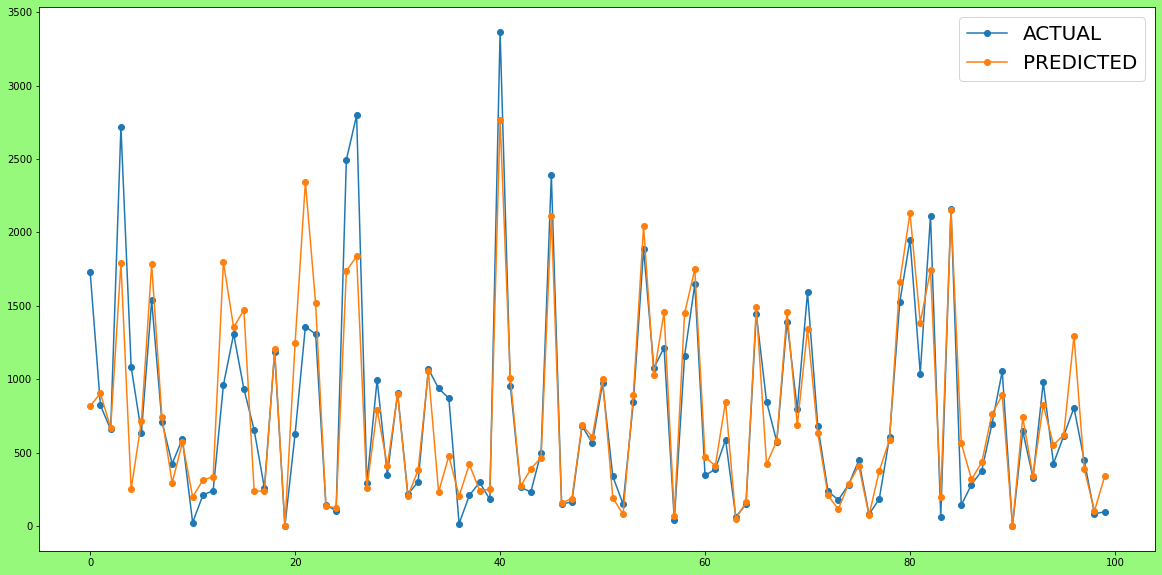

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv

knn_grid= GridSearchCV(knn_model,param_grid=param_dict_knn)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

##7)Decision Tree Regression

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,



================Evalution Matrix=========================

MSE : 86705.07097762689
RMSE : 294.45724813226605
R2 : 0.7881112838466634
Adjusted R2 :  0.7865511276301639
    =========================================================    Evalution Graph    ===================================================



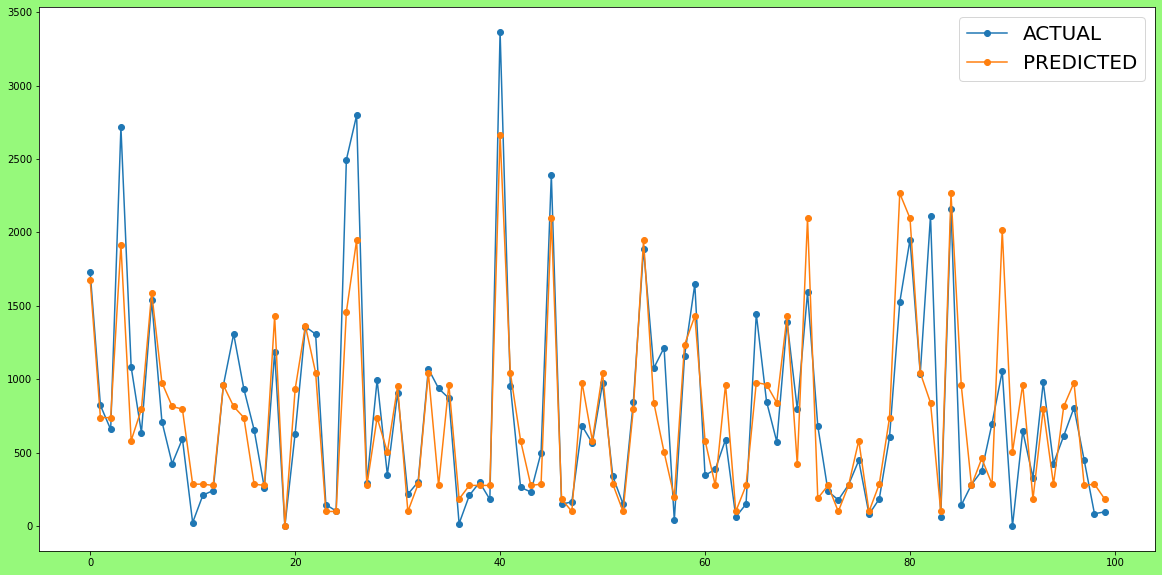

In [ ]:
#creating decision tree model
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=50, random_state=0)
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_reg,X_train,y_train,X_test,y_test)

Visualization of tree

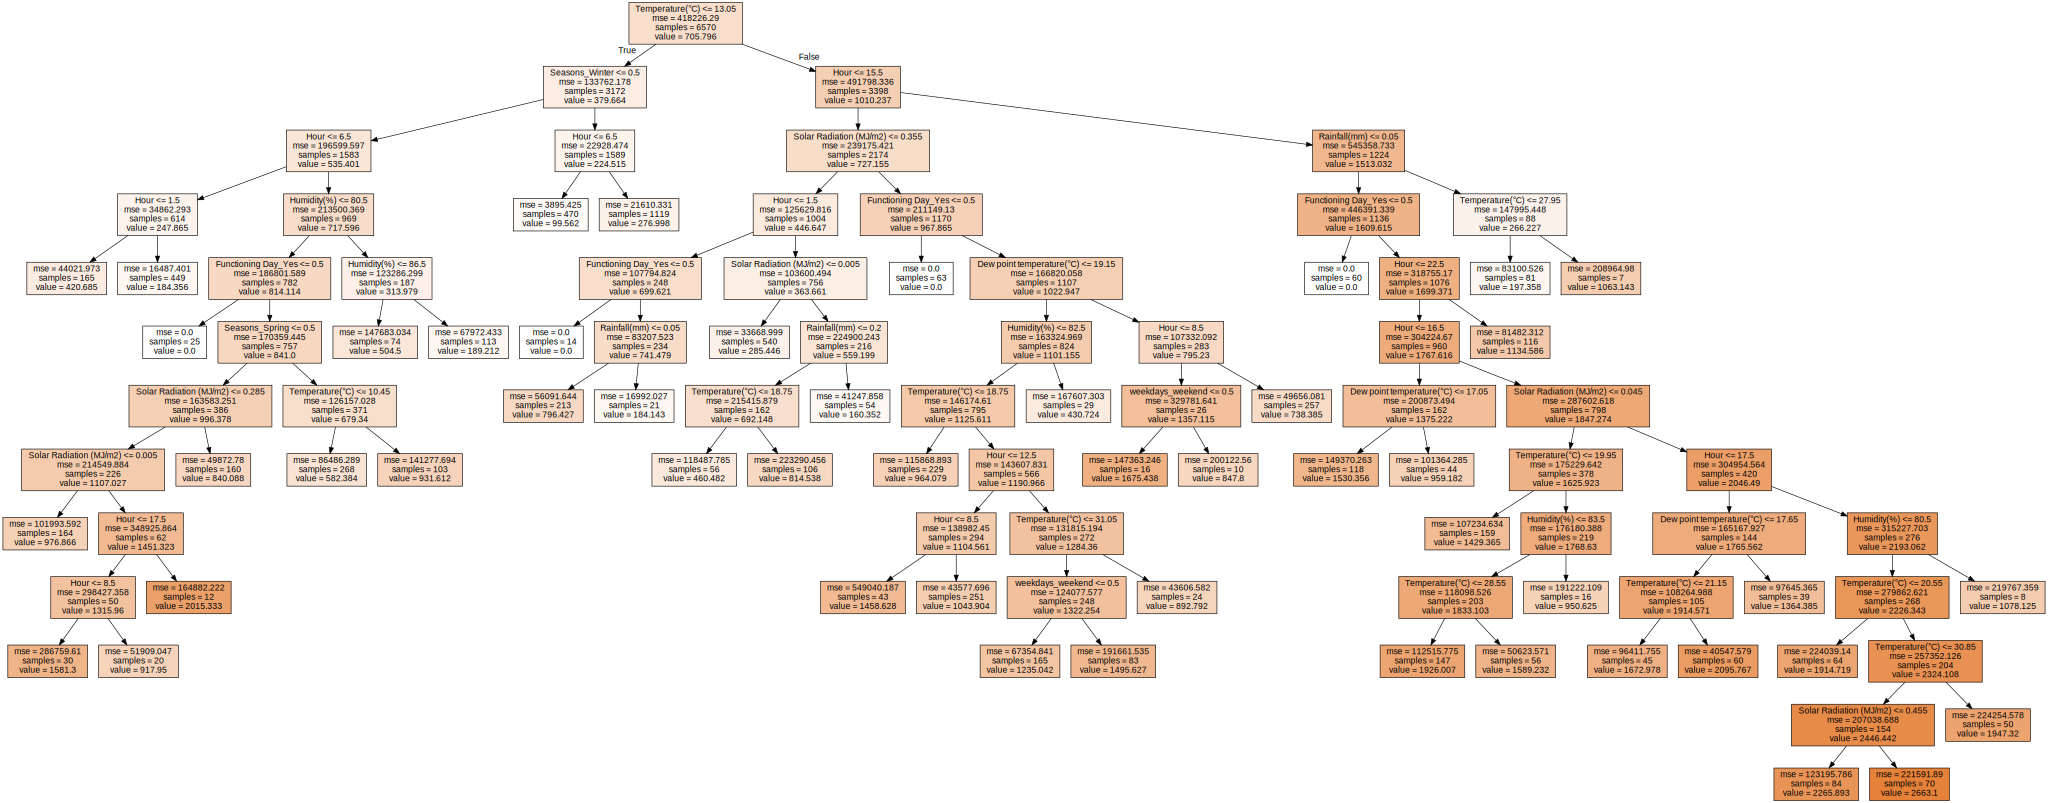

In [ ]:
#visualization of Decision tree
visualization_tree(dt_reg,X_train)

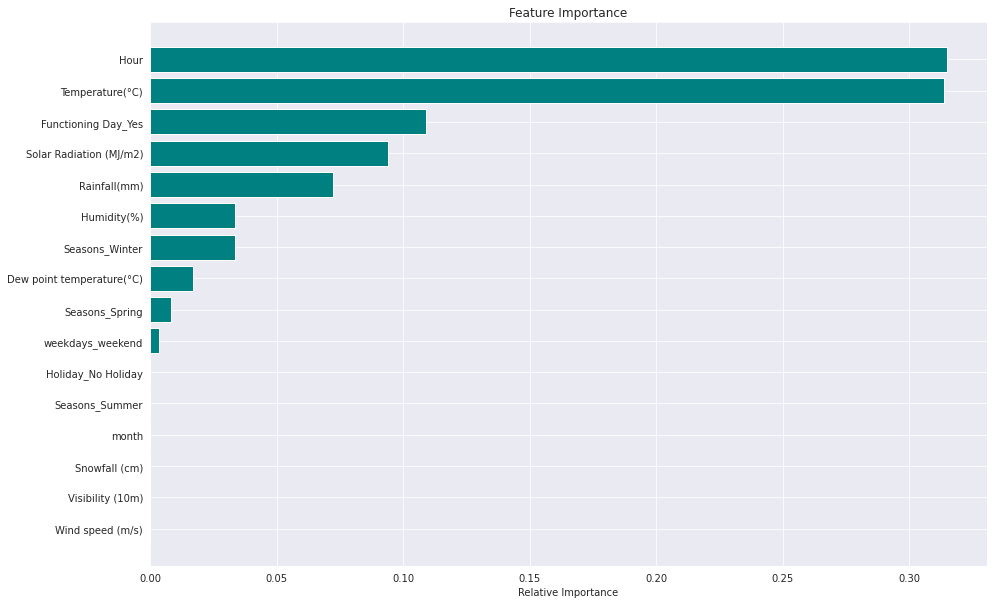

In [ ]:
#getting importance  features of decision tree
get_features_importance(dt_reg,X_train)

##8)Random Forest

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()

8.1.**GridSearchCV**

In [ ]:
#setting the parameter for gridsearchcv 
rf_grid = GridSearchCV(estimator=rf_model,
                           param_grid=parameters_dict_rf_grid,
                           cv=10,
                           n_jobs=-1)
                           
grid = rf_grid.fit(X_train,y_train)
grid.best_score_

0.8937265510473177

8.2.**RandomSearchCV**

In [ ]:
#setting tuning parameter for randomsearchcv
rnd_search = RandomizedSearchCV(rf_model, parameters_dict_rf_random, cv=10, 
                                          return_train_score=True)
rnd_search.fit(X_train,y_train)
rnd_search.best_score_

0.8902162318963913

Bst score obtained from gridSearchCV method


================Evalution Matrix=========================

MSE : 45323.696771070245
RMSE : 212.89362783106085
R2 : 0.8892385438145448
Adjusted R2 :  0.8884229969673441
    =========================================================    Evalution Graph    ===================================================



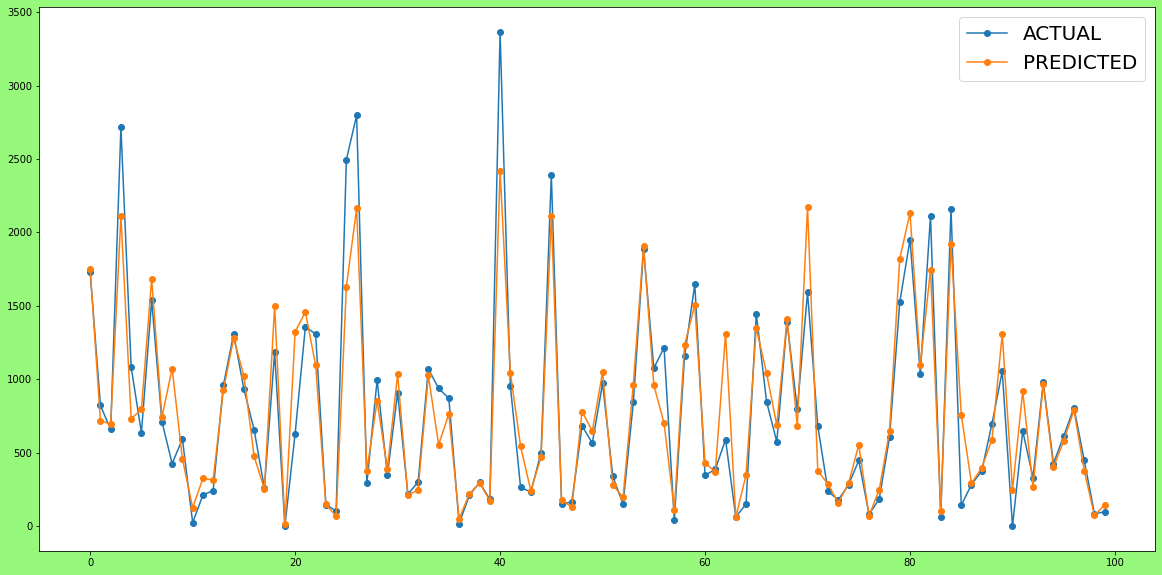

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

#comparing two randomSearchCV and gridsearchCV the score for GridSearchCV method gives more than randomSearchCV. So Use GridsearchCV hyperparameter tuning

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

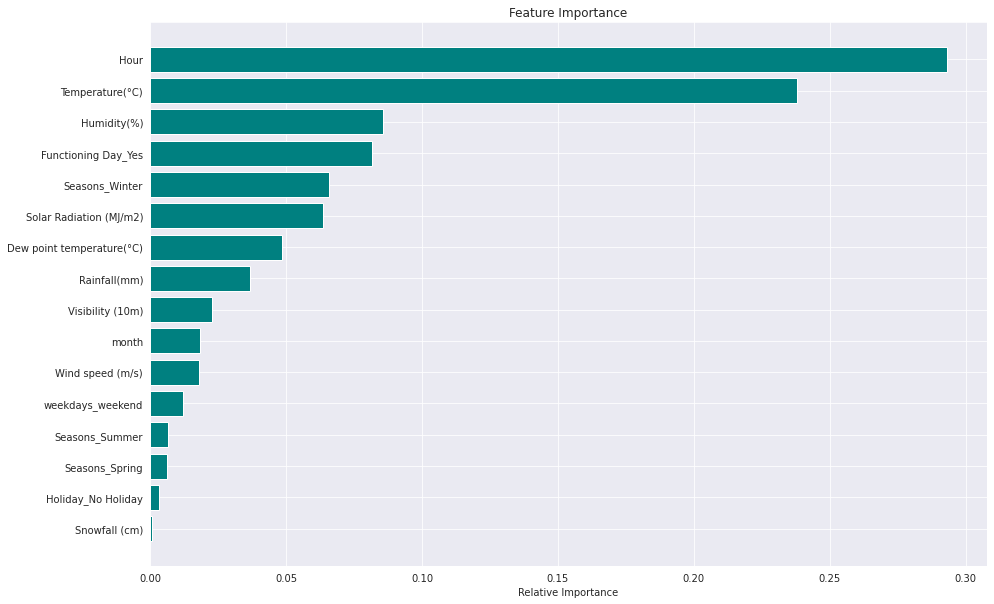

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

##9)Gradient Boosting


In [ ]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

9.1 **GridSearchCV**

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]
params = {'n_estimators':n_estimators,'max_depth':max_depth,'learning_rate':learning_rate }
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
gb_grid.fit(X_train,y_train)
gb_grid.best_score_

0.8518147125751498

In [ ]:
#best tuning parameter
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80}

9.2 **RandomSearchCV**

In [ ]:
#setting parameter with randomsearchCV
param_grid = {'n_estimators': [500,1000],
              'learning_rate': [0.02, 0.05],
              'max_depth': [1, 2],
              'min_samples_leaf': [5,10],
              'min_samples_split': [5,10]}

random_search =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=10, cv=5, verbose=0, n_jobs=-1)

random_search.fit(X_train, y_train)
random_search.best_score_

0.8423321557536191

Best score got from GridSearchCV and use those Hyperparameter


================Evalution Matrix=========================

MSE : 54535.000770841914
RMSE : 233.5273019816782
R2 : 0.8667280798174235
Adjusted R2 :  0.86574678634162
    =========================================================    Evalution Graph    ===================================================



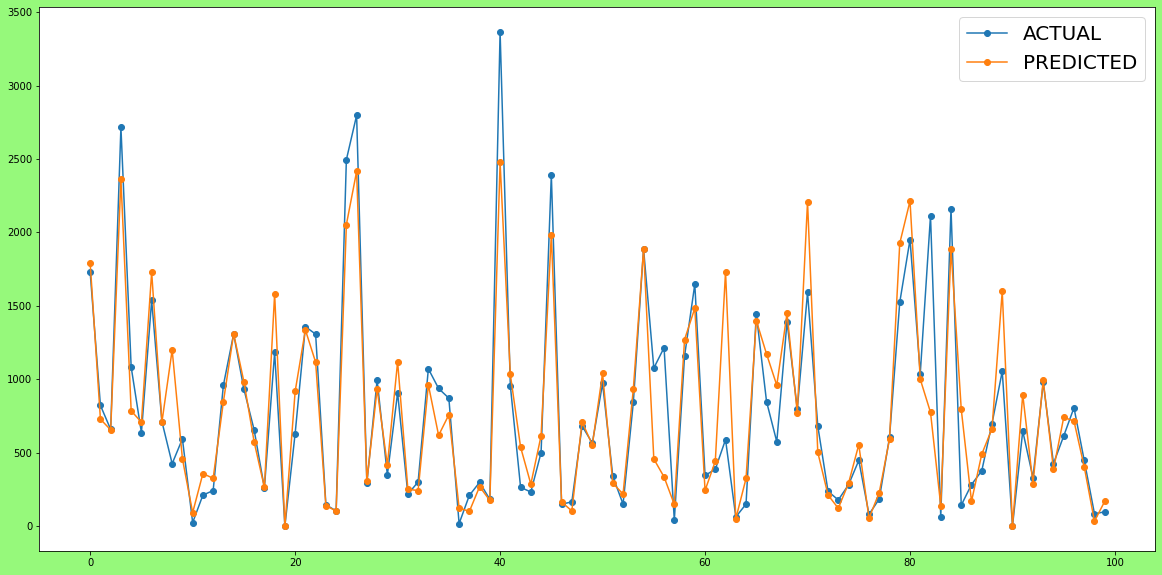

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

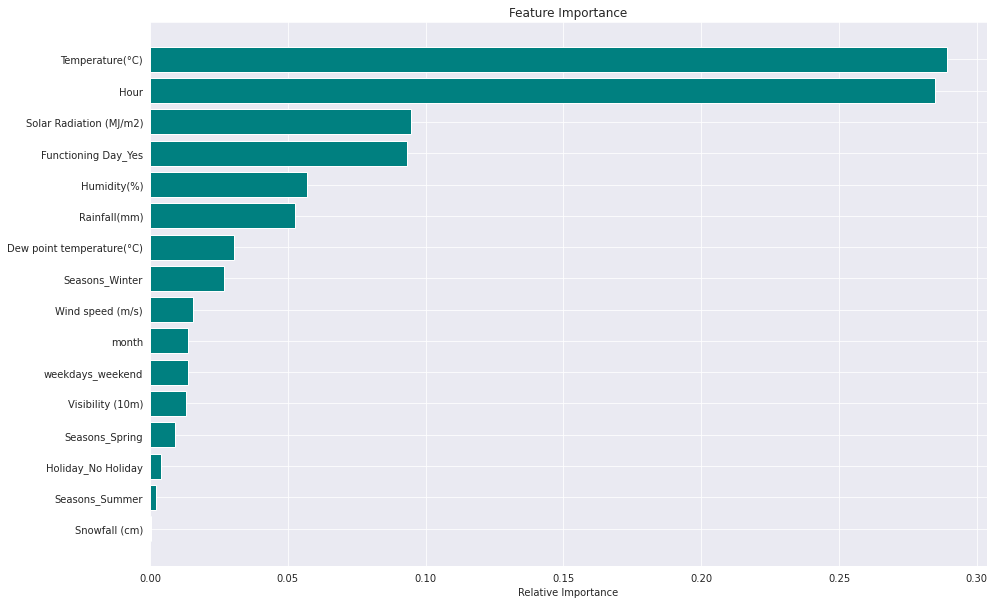

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

#10)eXtreme Gradient Boosting

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [15,20,30],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [80,100,150]}

xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_score_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


0.9064704407371981

Fitting 5 folds for each of 27 candidates, totalling 135 fits

================Evalution Matrix=========================

MSE : 37344.44008912131
RMSE : 193.24709593968367
R2 : 0.9087381467228033
Adjusted R2 :  0.9080661772555069
    =========================================================    Evalution Graph    ===================================================



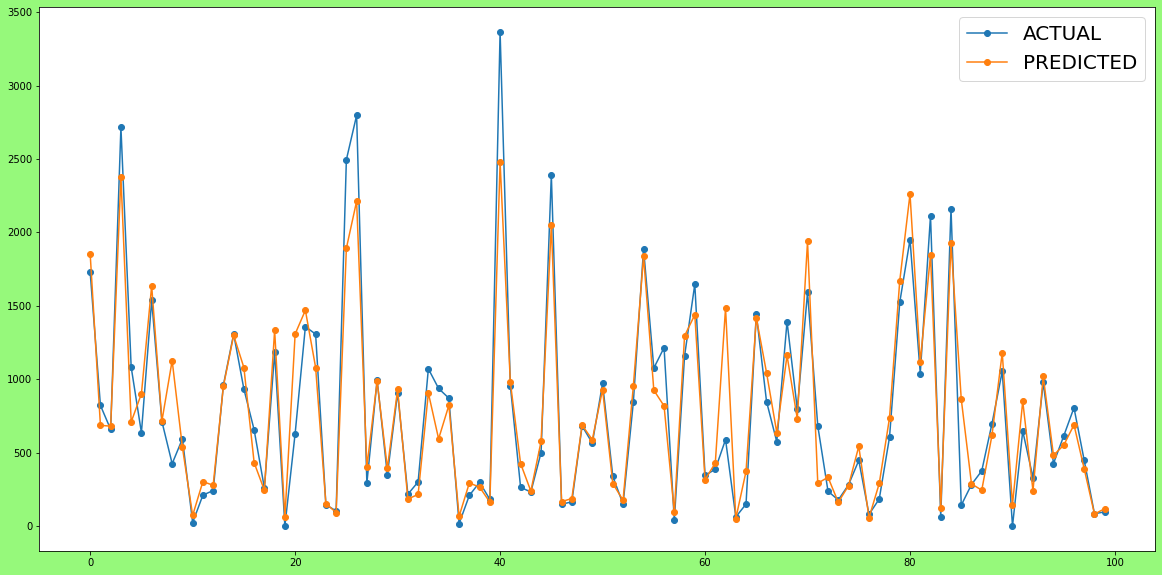

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [ ]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

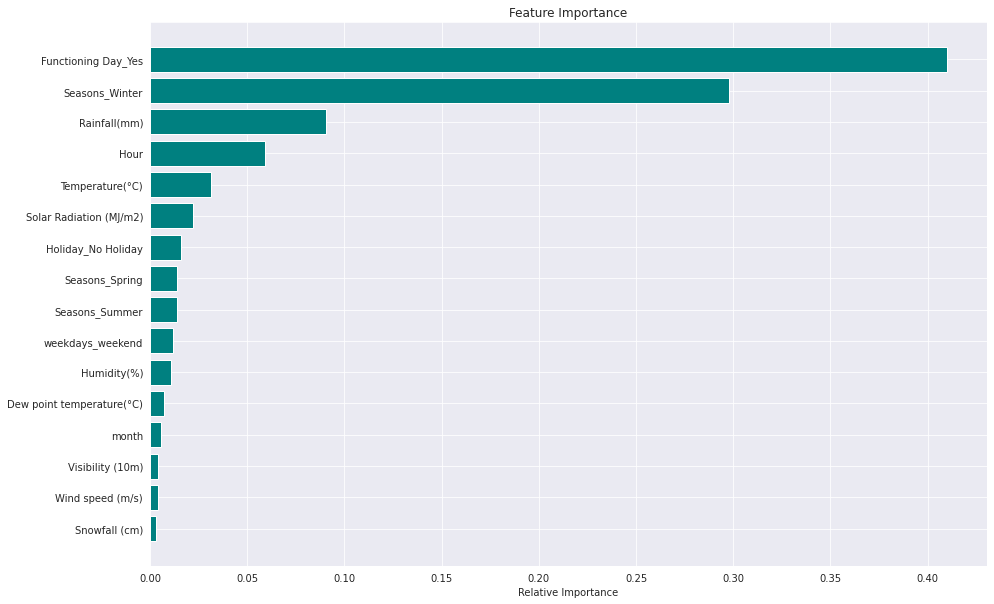

In [ ]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

#11)Cat Boost

In [ ]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [ ]:
cb_model=CatBoostRegressor()

Learning rate set to 0.055126
0:	learn: 622.7303740	total: 50.9ms	remaining: 50.8s
1:	learn: 601.8830202	total: 54.5ms	remaining: 27.2s
2:	learn: 580.4938464	total: 57.9ms	remaining: 19.2s
3:	learn: 560.9134145	total: 61ms	remaining: 15.2s
4:	learn: 542.5060715	total: 64.1ms	remaining: 12.8s
5:	learn: 526.7414247	total: 67.1ms	remaining: 11.1s
6:	learn: 511.1954082	total: 70.1ms	remaining: 9.94s
7:	learn: 496.4447154	total: 73.1ms	remaining: 9.07s
8:	learn: 481.9255943	total: 76.7ms	remaining: 8.45s
9:	learn: 469.7834574	total: 80.1ms	remaining: 7.93s
10:	learn: 457.1560805	total: 83.1ms	remaining: 7.47s
11:	learn: 446.0481959	total: 85.9ms	remaining: 7.07s
12:	learn: 435.2118823	total: 88.9ms	remaining: 6.75s
13:	learn: 425.6366574	total: 92.4ms	remaining: 6.5s
14:	learn: 417.9452664	total: 95.3ms	remaining: 6.26s
15:	learn: 409.2659083	total: 98.1ms	remaining: 6.03s
16:	learn: 400.7001339	total: 101ms	remaining: 5.85s
17:	learn: 393.5864189	total: 104ms	remaining: 5.67s
18:	learn: 38

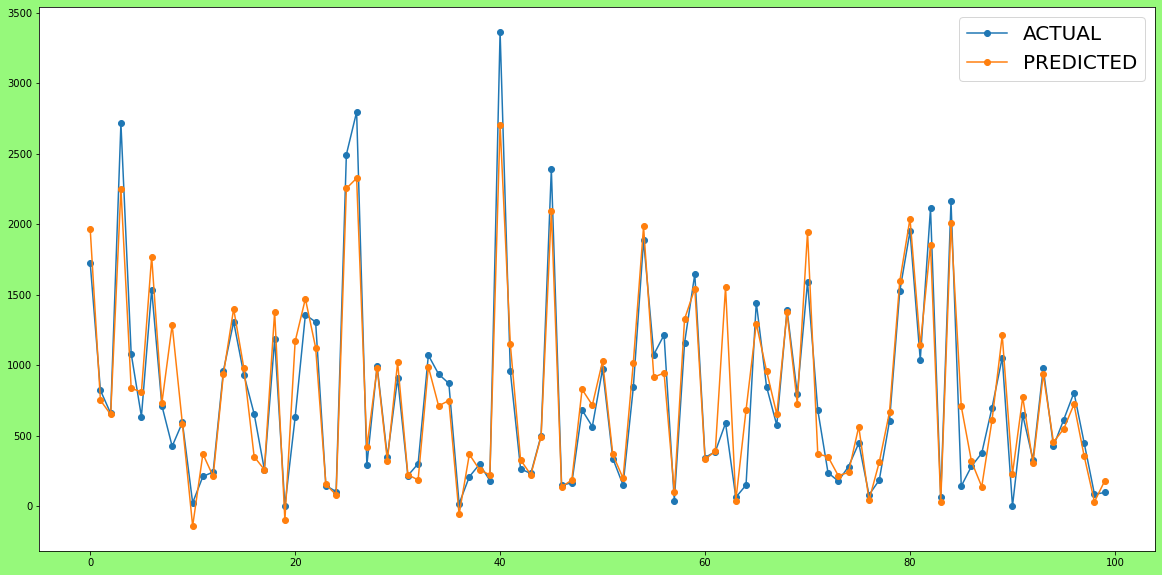

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [ ]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05512600019574165,
 'score_function': '

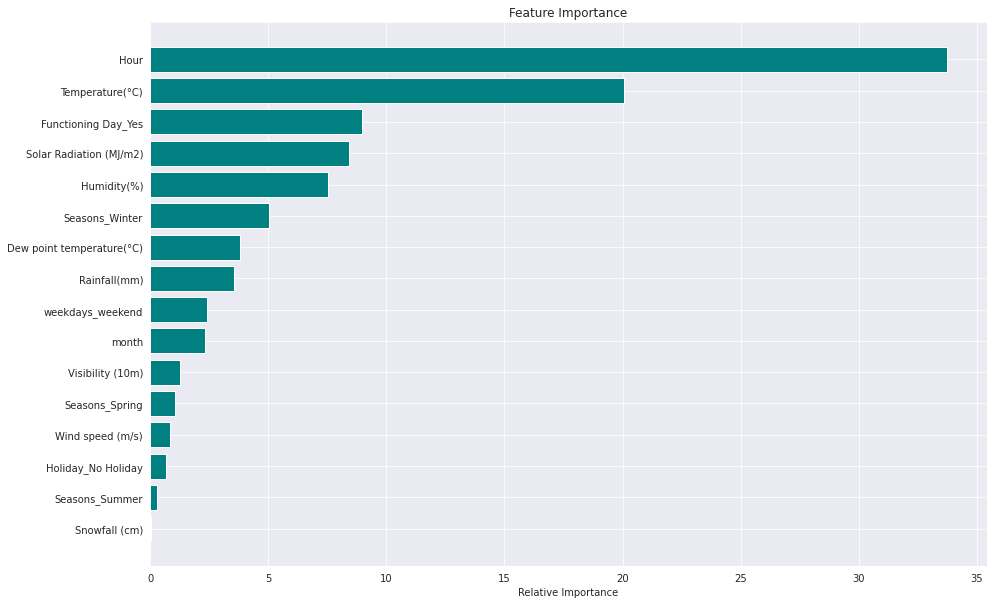

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

#12)lightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgbr=lgb.LGBMRegressor()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 35416.0272513697
RMSE : 188.19146434248736
R2 : 0.9134507767431425
Adjusted R2 :  0.9128135068065987
    =========================================================    Evalution Graph    ===================================================



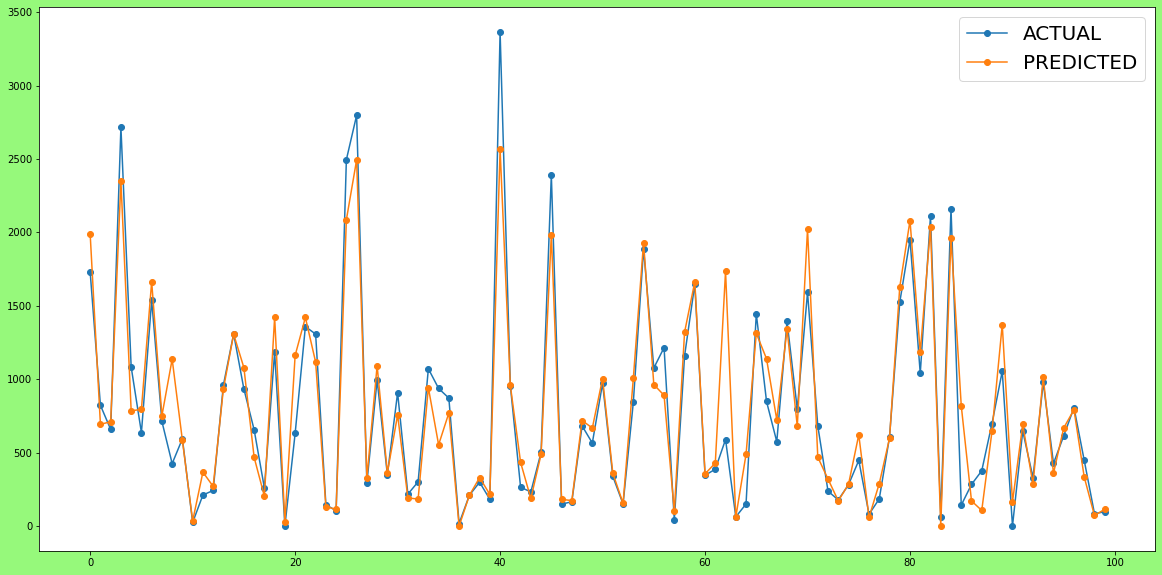

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

In [ ]:
#checking params of light XBM model
lgbr.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

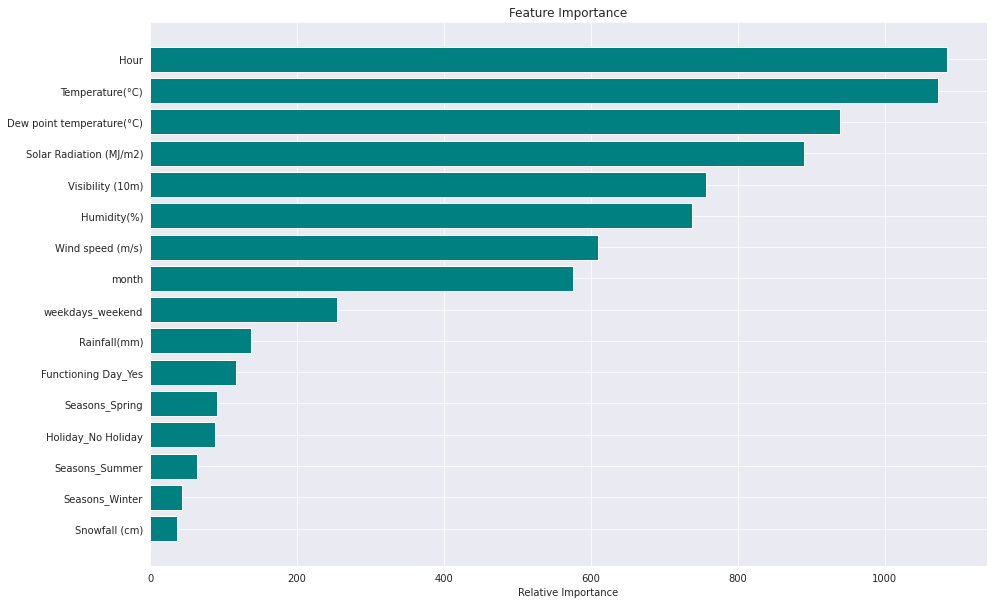

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

##Summary of all model

In [ ]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_Square_Error':Mean_Sq_Error,'Root_Mean_Square_Error':Root_Mean_Sq_Error,'R2':R2_List,'Adjusted_R2':Adj_R2_List}

In [ ]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']

In [ ]:
Mean_Sq_Error

[175590.55287332067,
 175561.28194420706,
 175439.1127526881,
 175346.87865283425,
 117565.50002070636,
 83411.75920852358,
 86705.07097762689,
 45323.696771070245,
 54535.000770841914,
 37344.44008912131,
 36531.5465968402,
 35416.0272513697]

In [ ]:
#converting dictionary to dataframe fro easy visual
Evaluation_Matrics=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
Evaluation_Matrics

Linear          Lasso          Ridge  \
Mean_Square_Error       175590.552873  175561.281944  175439.112753   
Root_Mean_Square_Error     419.035264     419.000336     418.854525   
R2                           0.572911       0.572982       0.573279   
Adjusted_R2                  0.569766       0.569838       0.570137   

                           Elasticnet     Polynomial  K-Nearyest_Neighbor  \
Mean_Square_Error       175346.878653  117565.500021         83411.759209   
Root_Mean_Square_Error     418.744407     342.878258           288.810940   
R2                           0.573504       0.714045             0.796159   
Adjusted_R2                  0.570363       0.711940             0.794659   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_Square_Error        86705.070978   45323.696771       54535.000771   
Root_Mean_Square_Error     294.457248     212.893628         233.527302   
R2                           0.788111       0.889239           0.866728   
Adjusted_R2                  0.786551       0.888423           0.865747   

                           Xtreme_GB      CATBoost      lightGBM  
Mean_Square_Error       37344.440089  36531.546597  35416.027251  
Root_Mean_Square_Error    193.247096    191.132275    188.191464  
R2                          0.908738      0.910725      0.913451  
Adjusted_R2                 0.908066      0.910067      0.912814

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_evaluation_matrices=Evaluation_Matrics.transpose().reset_index().rename(columns={'index':'Models'})
final_evaluation_matrices

Models  Mean_Square_Error  Root_Mean_Square_Error        R2  \
0                Linear      175590.552873              419.035264  0.572911   
1                 Lasso      175561.281944              419.000336  0.572982   
2                 Ridge      175439.112753              418.854525  0.573279   
3            Elasticnet      175346.878653              418.744407  0.573504   
4            Polynomial      117565.500021              342.878258  0.714045   
5   K-Nearyest_Neighbor       83411.759209              288.810940  0.796159   
6         Decision_Tree       86705.070978              294.457248  0.788111   
7         Random_Forest       45323.696771              212.893628  0.889239   
8     Gradient_Boosting       54535.000771              233.527302  0.866728   
9             Xtreme_GB       37344.440089              193.247096  0.908738   
10             CATBoost       36531.546597              191.132275  0.910725   
11             lightGBM       35416.027251              188.191464  0.913451   

    Adjusted_R2  
0      0.569766  
1      0.569838  
2      0.570137  
3      0.570363  
4      0.711940  
5      0.794659  
6      0.786551  
7      0.888423  
8      0.865747  
9      0.908066  
10     0.910067  
11     0.912814

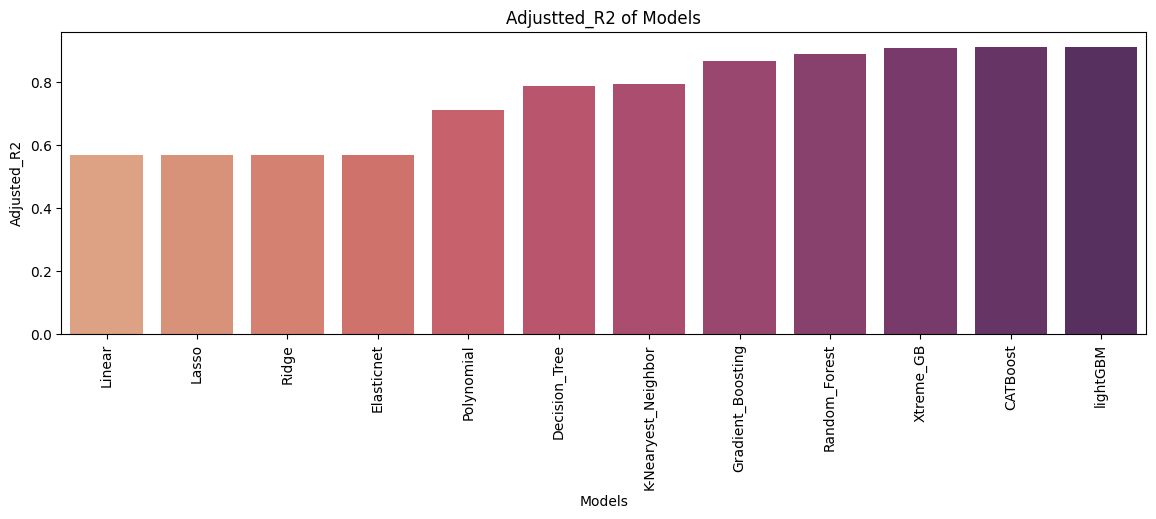

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_evaluation_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

##Model Explainibility

#SHAP

In [ ]:

pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.2 MB/s 


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

##1)Random Forest Model Explainability

In [ ]:
#calling treeExplainer for model explainability 
explainer_train = shap.TreeExplainer(optimal_rf_model)
shap_values_train = explainer_train.shap_values(X_train)

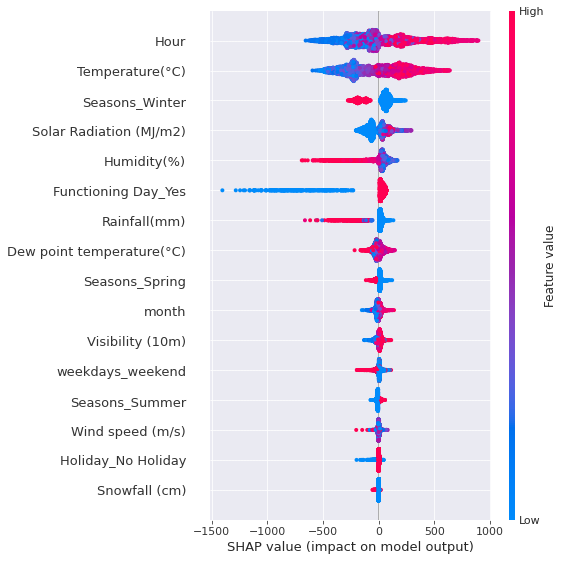

In [ ]:
#plotting summary plot with help of shap value
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
#setting which observation want to visualize ... later you can change to any obervation
for_instance=2

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(optimal_rf_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#2) Gradient Boosting Explainability

In [ ]:
#calling treeExplainer for model explainability 
explainer_train = shap.TreeExplainer(optimal_gb_model)
shap_values_train = explainer_train.shap_values(X_train)

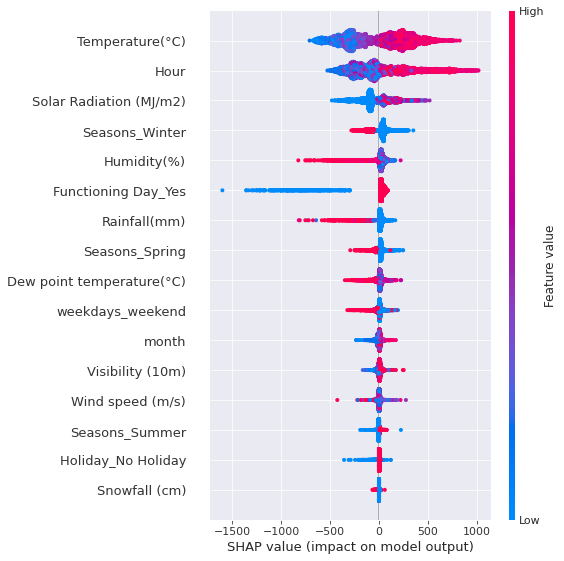

In [ ]:
#plotting summary plot with help of shap value
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
for_instance=3

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(optimal_gb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#3) XG Boosting Explainability

In [ ]:
for_instance=5

In [ ]:
#calling treeExplainer for model explainability 
explainer_train = shap.TreeExplainer(optimal_xgb_model)
shap_values_train = explainer_train.shap_values(X_train,check_additivity=False)

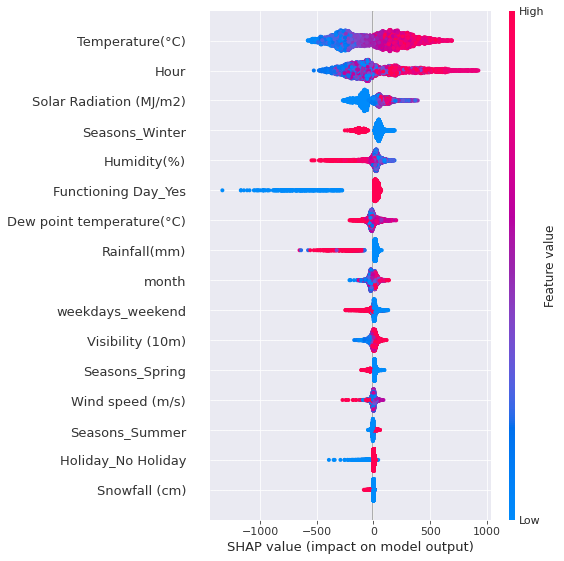

In [ ]:
#plotting summary plot with help of shap value
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(optimal_xgb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#4) Cat Boost Explainability

In [ ]:
for_instance=4

In [ ]:
#calling treeExplainer for model explainability 
explainer_train = shap.TreeExplainer(cb_model)
shap_values_train = explainer_train.shap_values(X_train)

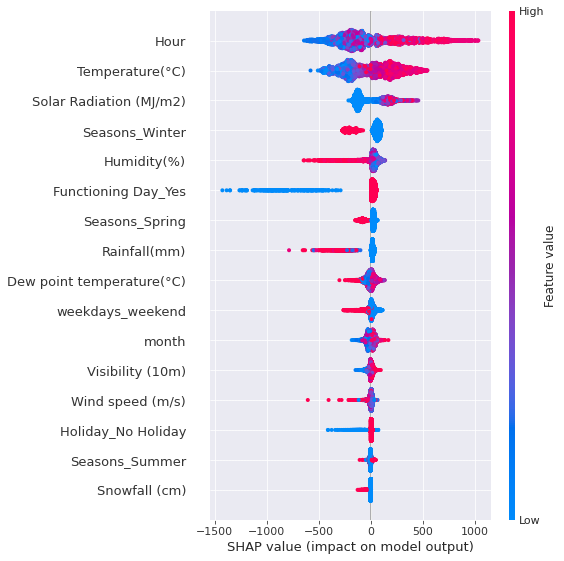

In [ ]:
#plotting summary plot with help of shap value
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#5)lightGBM

In [ ]:
for_instance=5

In [ ]:
#calling treeExplainer for model explainability 
explainer_train = shap.TreeExplainer(lgbr_grid.best_estimator_)
shap_values_train = explainer_train.shap_values(X_train)

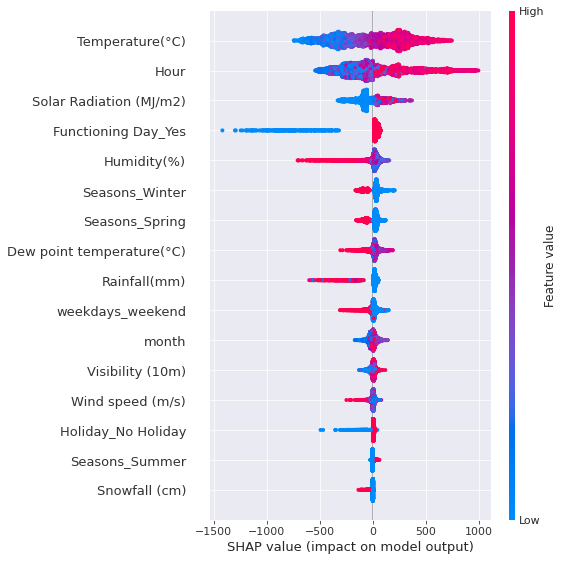

In [ ]:
#plotting summary plot with help of shap value
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

##ELI5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 30.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=22182b2fed5132993850246131f8ce9bbe0cc4562fd2dbb6691767dd83f58102
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5 as eli


#1)Random Forest-Eli5

In [ ]:
for_instance=8

In [ ]:
#convet into list of all features
feature_names=list(X_test.columns)

In [ ]:
#eli5 for random boost model 
eli.show_prediction(optimal_rf_model, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeReg

#2)XGBoost -Eli5

In [ ]:
for_instance=8

In [ ]:

#convet into list of all features
feature_names=list(X_test.columns)

In [ ]:
#eli5 for xgboost model 
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

#3)light GBM-ELI5

In [ ]:
for_instance=8

In [ ]:
#convet into list of all features
feature_names=list(X_test.columns)

In [ ]:
#eli5 for light GBM model 
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

##SUMMAY OF THE PROJECT
1) **Multicollinearity is removed from our dataset and  Dew point temperature more correlated with the dependent variable (Rented Bike count)**

2)**During weekdays, morning and evening the demand for the rented bike is more
Also, temperature, less rainfall time booking of the bike is high**

3)**Other parameters such humidity, visibility, heavy rain, wintertime, dew point temperature affect the booking of the rented   bike and decrease drastically**

4)**Performed different Regression models and light GBM, CAT Boost gives the better result.**

5)**Random forest, XGBoost also gives a better result but slightly lesser than above mentioned two model.**

6)**The dataset is huge and takes more time to compute when run with hyperparameter selection such as GridSearchCV and RandomSearachCV.**


7)**The mean square error, root mean square error is low and R2, Adjusted R2 is high for selected model CAT Boost, GBM model.**

In [2]:
import colorama
from colorama import Fore

print(Fore.GREEN + '============================================================THANK YOU ALMABETTER==============================================================='.center(170))

             ============================================================THANK YOU ALMABETTER===============================================================              


In [1]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
